## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform wine segmentation.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with clear boundaries.

### c) Understanding the Context 

Champagne Company is a leading wine company that specialises in the importation and
distribution of premium and super-premium wines, champagnes and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialised products and the ever-increasing tourism industry
where guests don ́t want to settle for less.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from sklearn.cluster import KMeans                        # Kmeans Clustering Algorithm
from sklearn.cluster import AgglomerativeClustering       # Hierachical Clustering Algorithm

In [ ]:
df = pd.read_csv('datasets_626341_1116242_wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# check dataset shape
df.shape

(178, 13)

In [ ]:
# chekc data types
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(178, 13)

In [ ]:
# check for missing data
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## <font color='#2F4F4F'>3. Data Analysis</font>

In [ ]:
# get descriptive statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


What do you notice about the descriptive statistics, particularly the ranges? What does this tell you?

From the descriptive statististics, we see that some features have large ranges, which means we will need to scale them.

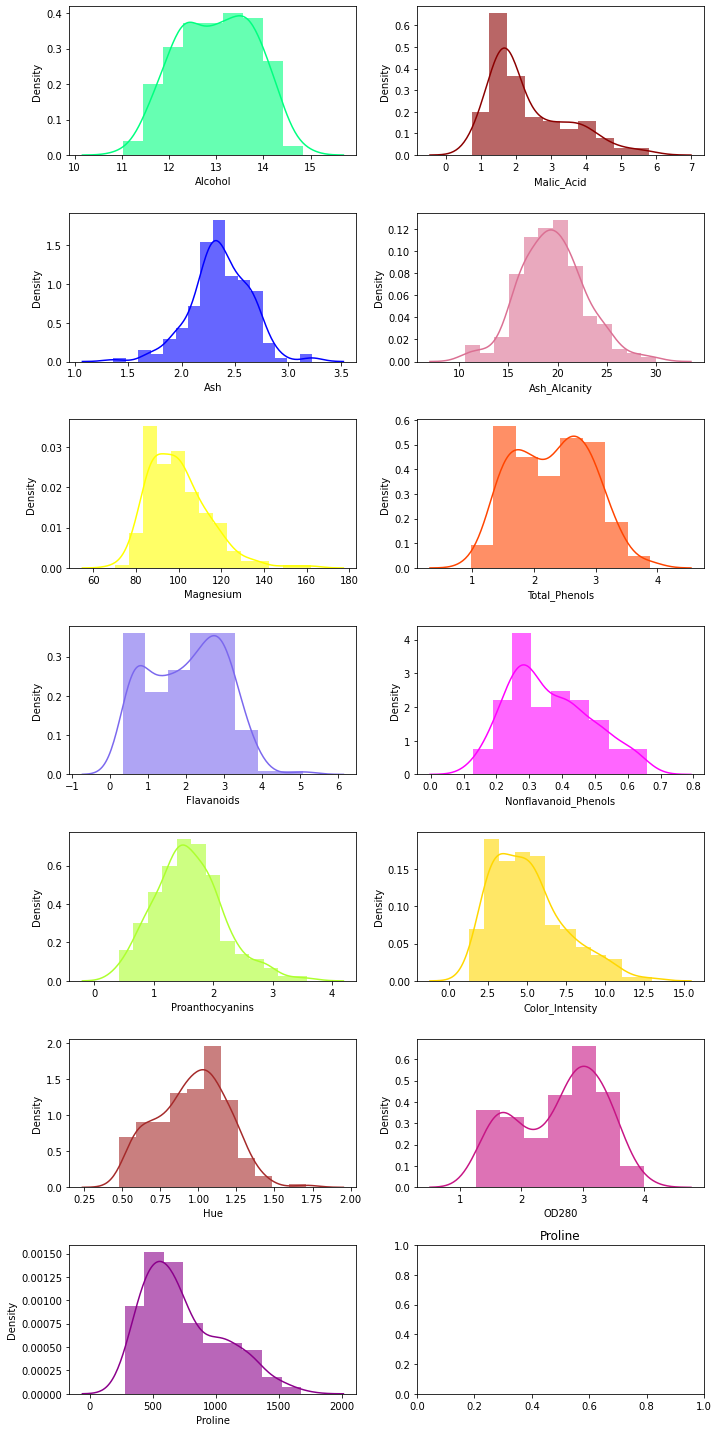

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()

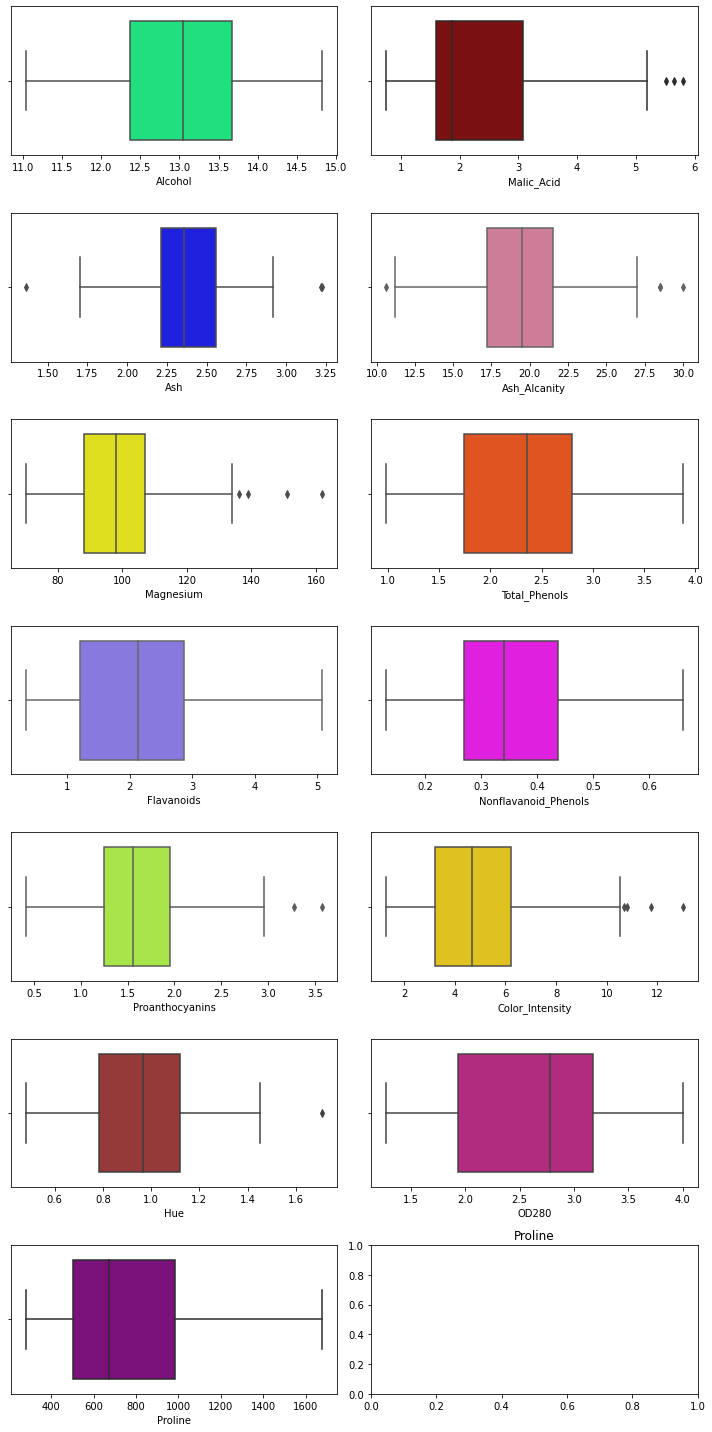

In [ ]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

## Observation

We can see that some of the variables have a few outliers. We will not remove them because we want to see how they will impact the clustering model.


*  Most of the values for proline, nonflavanoid phenols, and malic acid fall between the median and upper quartile
*   Most of the values for OD280, flavanoids, total phenols fall between the median and lower quartile
* Hue, color intensity, proanthocyanins, magnesium, ash and ash alcanity outliers




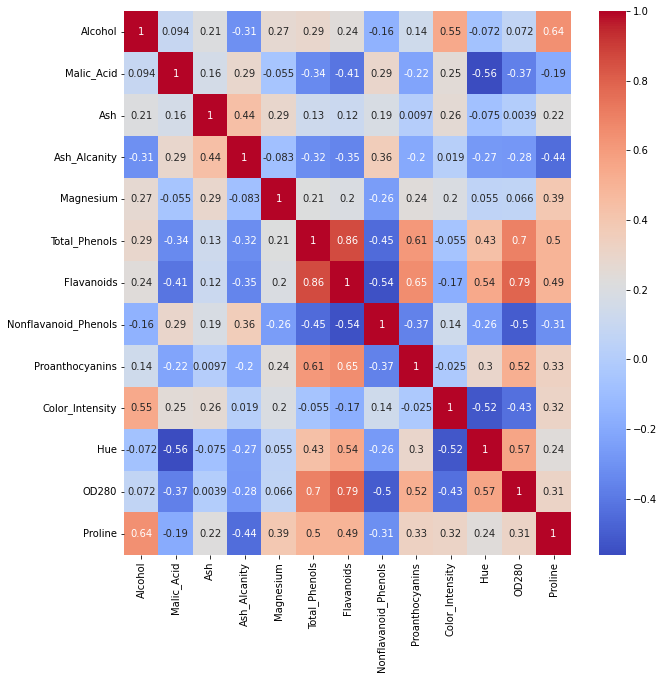

In [ ]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

## Observation

There is a strong positive correlation between Total_Phenols and Flavanoids (0.86), total_Phenols and OD280 (0.79), and 0D280 and Flavanoids (0.79).

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# set all the features into X
X = df.values
X.shape

(178, 13)

In [ ]:
# scale our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# Fit and transform our features
X = sc.fit_transform(X)

### 4.1 KMeans Clustering

In [ ]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

# getting the cluster labels

kmeans = KMeans(5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
# getting the cluster labels

kmeans.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 3, 2, 3, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 0, 4, 4, 3, 2,
       3, 3, 3, 3, 3, 4, 4, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 2,
       4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 2, 2, 4, 4, 4, 4, 2, 3, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

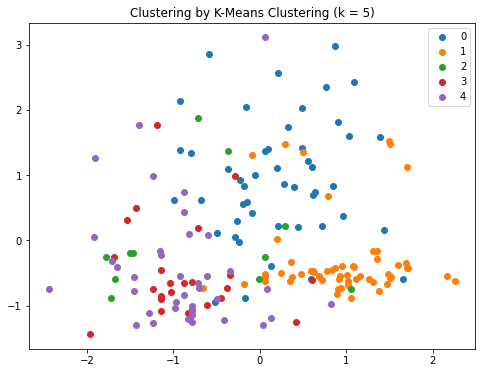

In [ ]:
# getting the KMeans scatter plot
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)")
plt.legend()
plt.show()

In [40]:
# getting the optimum value of k for our KMeans model using the Elbow Method

# We will define an empy list where we will be required to store  errors

#
Error = []

# Calculating the sum of errors for 1-10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

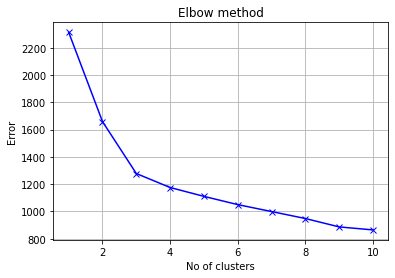

In [41]:
# visualizing the distribution of errors per number of clusters
# We plot our elbow method visualisation: No. of clusters vs Error
# ---
# 
# 
plt.plot(range(1, 11), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

## From the above Elbow Method, what cluster number is ideal?

The optimal value of k is 3, as the elbow-like shape is formed at k=3 in the above graph. We can implement k-means again using k = 3.

In [42]:
# if needed, improve your model here and visualize it
#Getting the optimum value of k for our KMeans model using the Silhouette Analysis

from sklearn.metrics import silhouette_score
silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

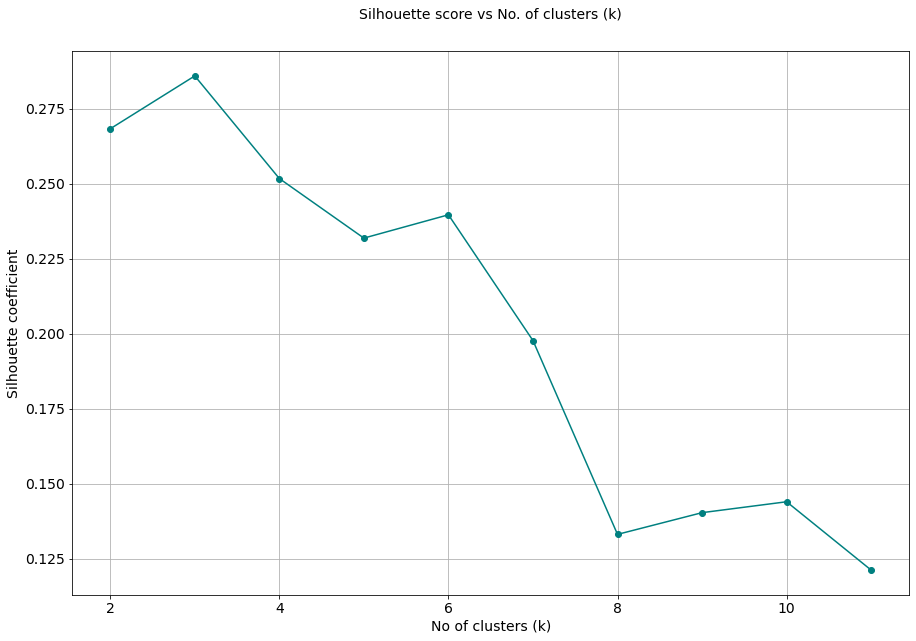

In [44]:
# We plot our Silhouette Plot
# ---
# 
plt.figure(figsize=(15,10))
plt.plot(range(2, 12), silhouette, 'bx-', marker='o', color="teal")
plt.title('Silhouette score vs No. of clusters (k)', fontsize=14, y=1.05)
plt.xlabel('No of clusters (k)', fontsize=14)
plt.ylabel('Silhouette coefficient', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True);

## Does the visualization of your model with the new value of k look better than the original one?

Yes,the silhouette plot shows the that the silhouette coefficient was highest when k = 3, suggesting that's the optimal number of clusters. Three clusters best captures the segmentation of this data set.

In [48]:
# add these cluster labels to our dataset
#Lets now create the agglomerative clusterer that we will use to perform cluster analysis.

agglo_clusterer = AgglomerativeClustering().fit(X) 


In [49]:
# We can preview our created labels as shown
# ---
#
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [50]:
# We then store our labels to a new column belongs to and then store this in a new column of our dataframe.
# --- 
df['agg_cluster_group'] = labels

In [52]:
# Lets sample our dataframe and check our agg_cluster_group column
# ---
#
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,agg_cluster_group
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,0
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,1
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


### 4.2 Hierarchical Agglomerative Clustering

In [53]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC

agglo_clusterer = AC(n_clusters = 5).fit(X) 

# get the labels
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4])

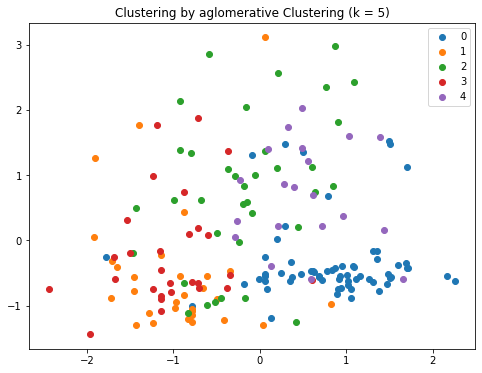

In [54]:
# Creating a scatter plot of the cluster analysis

aglo_clust = np.unique(labels)

plt.figure(figsize = (8, 6))
for cluster in aglo_clust:
    row_ix = np.where(labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by aglomerative Clustering (k = 5)")
plt.legend()
plt.show()

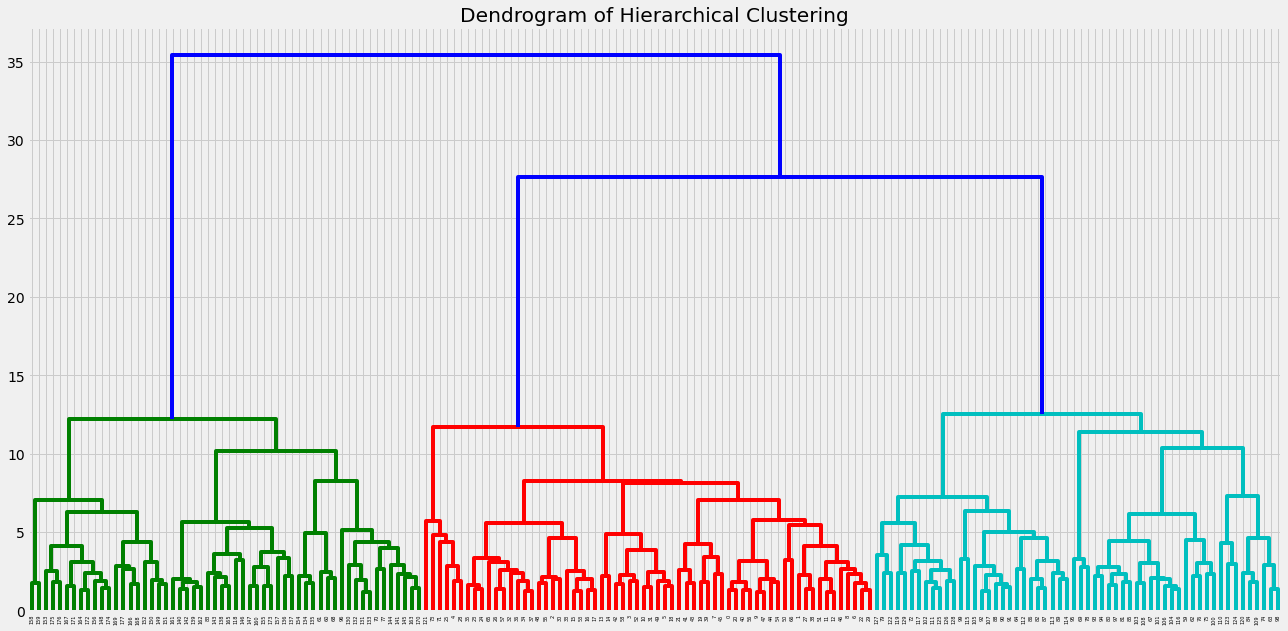

In [55]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.style.use("fivethirtyeight")
plt.figure(figsize = (20, 10))
hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title("Dendrogram of Hierarchical Clustering")
plt.show()

## Observation

If we were to draw a horizontal line that cuts through all the vertical blue lines with the highest heights showing the furthest distances, we would cut through three lines ideally showing that there are three cluster groups

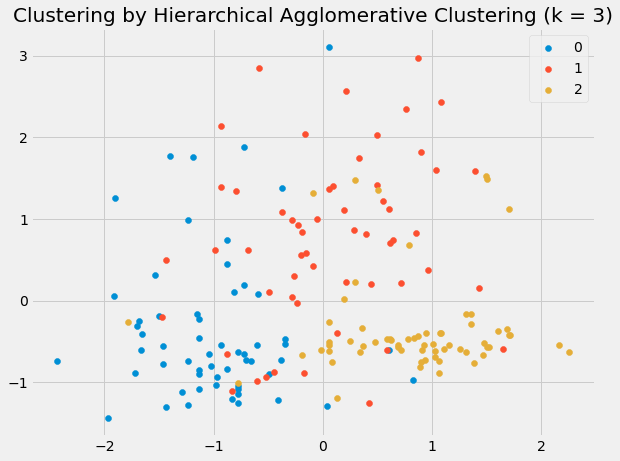

In [57]:
# improve your agglomerative clustering model
#agglomerative clustering with 3 clusters
agg3 = AC(n_clusters = 3)
agg3.fit(X)

agg3_labels = agg3.labels_
agg3_clust = np.unique(agg3_labels)


plt.figure(figsize = (9, 7))
for cluster in agg3_clust:
    row_ix = np.where(agg3_labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by Hierarchical Agglomerative Clustering (k = 3)")
plt.legend()
plt.show()


## Observation

Using 3 clusters instead of 5 has yielded a better result, so we will add the results to our dataset as well so we can compare how the hierarchical agglomerative clustering results differ from the k-means clustering results.

In [58]:
# adding to our dataset
df['agglomerative_cluster_group'] = agg3_labels

# previewing a sample of our dataset
df.sample(10)



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,agg_cluster_group,agglomerative_cluster_group
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,1
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,1,1
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,1,1
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,0,2
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550,1,1
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,0,2
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,0,2
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,1,1
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,0,2
15,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310,0,2


## <font color='#2F4F4F'>5. Summary of Findings</font>

We see that using k=3 is the best parameter to set when performing clustering on this dataset.

## <font color='#2F4F4F'>6. Recommendations</font>

While the two clustering models performed fairly well, I recommend further analysis and modeling to improve the solution until clear cluster boundaries are established.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
       Yes

#### b) Did we have the right data?
        Yes

#### c) What can be done to improve the solution?

Try out other clustering algorithms to see if they will improve the solution. Like:

* DBSCAN Clustering
* Affinity Propagation
* Birch Clustering


We can also try removing outliers and highly correlated variables to see if it will improve the model.

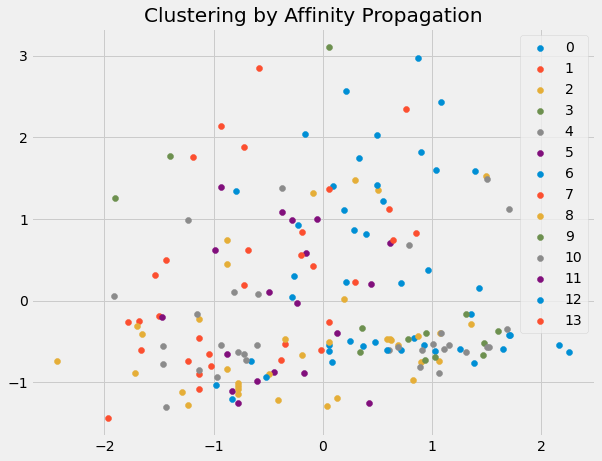

In [59]:
# Affinity Propagation
from sklearn.cluster import AffinityPropagation as AP

ap = AP()
ap.fit(X)

ap_pred = ap.predict(X)
clusters = np.unique(ap_pred)

plt.figure(figsize = (9, 7))
for cluster in clusters:
    row_ix = np.where(ap_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by Affinity Propagation")
plt.legend()
plt.show()

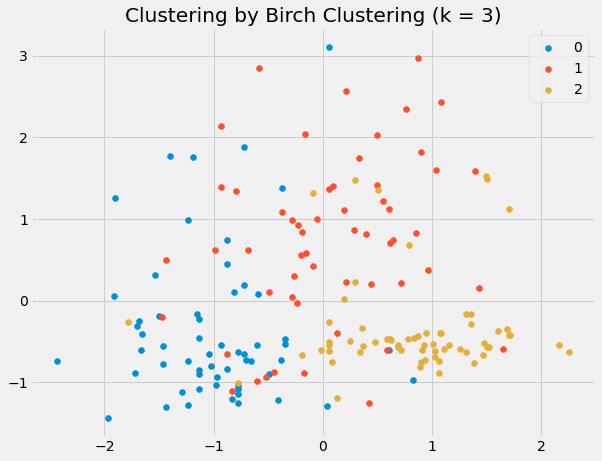

In [60]:
# Birch clustering
from sklearn.cluster import Birch

birch = Birch()
birch.fit(X)

birch_pred = birch.predict(X)
birch_clust = np.unique(birch_pred)

plt.figure(figsize = (9, 7))
for cluster in birch_clust:
    row_ix = np.where(birch_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by Birch Clustering (k = 3)")
plt.legend()
plt.show()

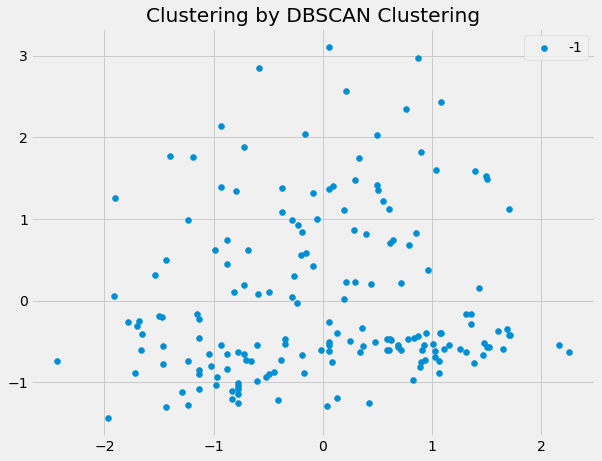

In [61]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.30, min_samples = 9)
dbscan.fit(X)

dbscan_pred = dbscan.labels_
dbscan_clust = np.unique(dbscan_pred)

plt.figure(figsize = (9, 7))
for cluster in dbscan_clust:
    row_ix = np.where(dbscan_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by DBSCAN Clustering")
plt.legend()
plt.show()